In [1]:
import pandas as pd
import numpy as np


#For Data Visualization


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# For Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(data.shape)
data.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


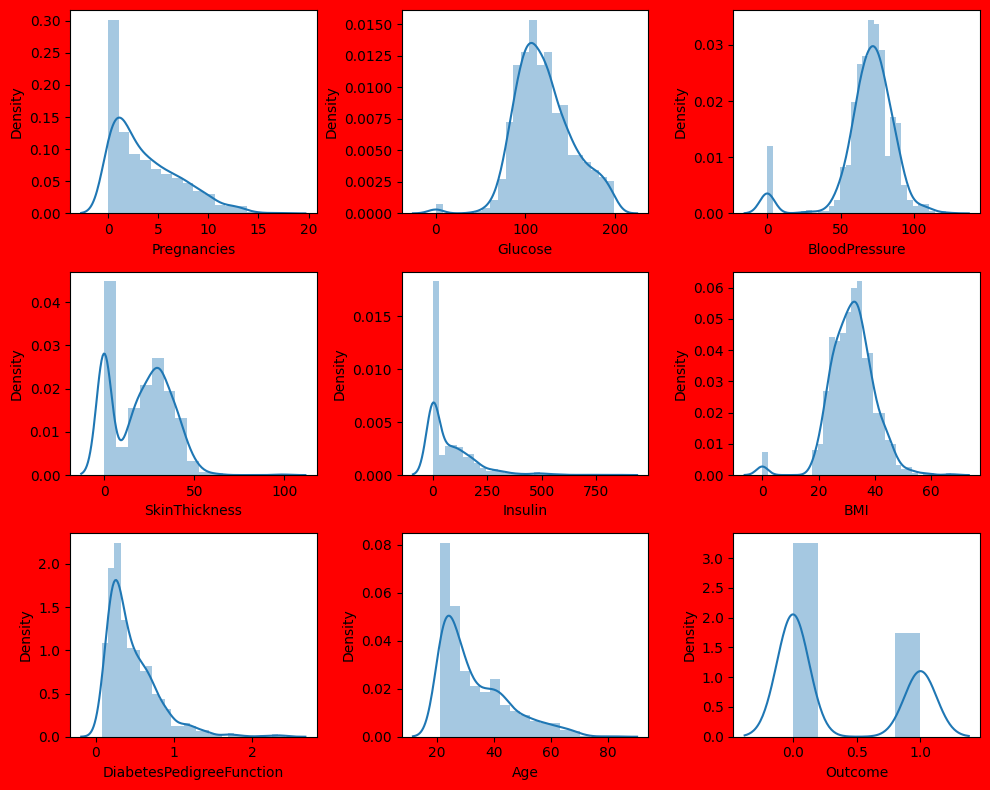

In [4]:
plt.figure(figsize=(10,8),facecolor='red')
graph=1
for column in data:
    if graph <=9:
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.tight_layout()

In [5]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

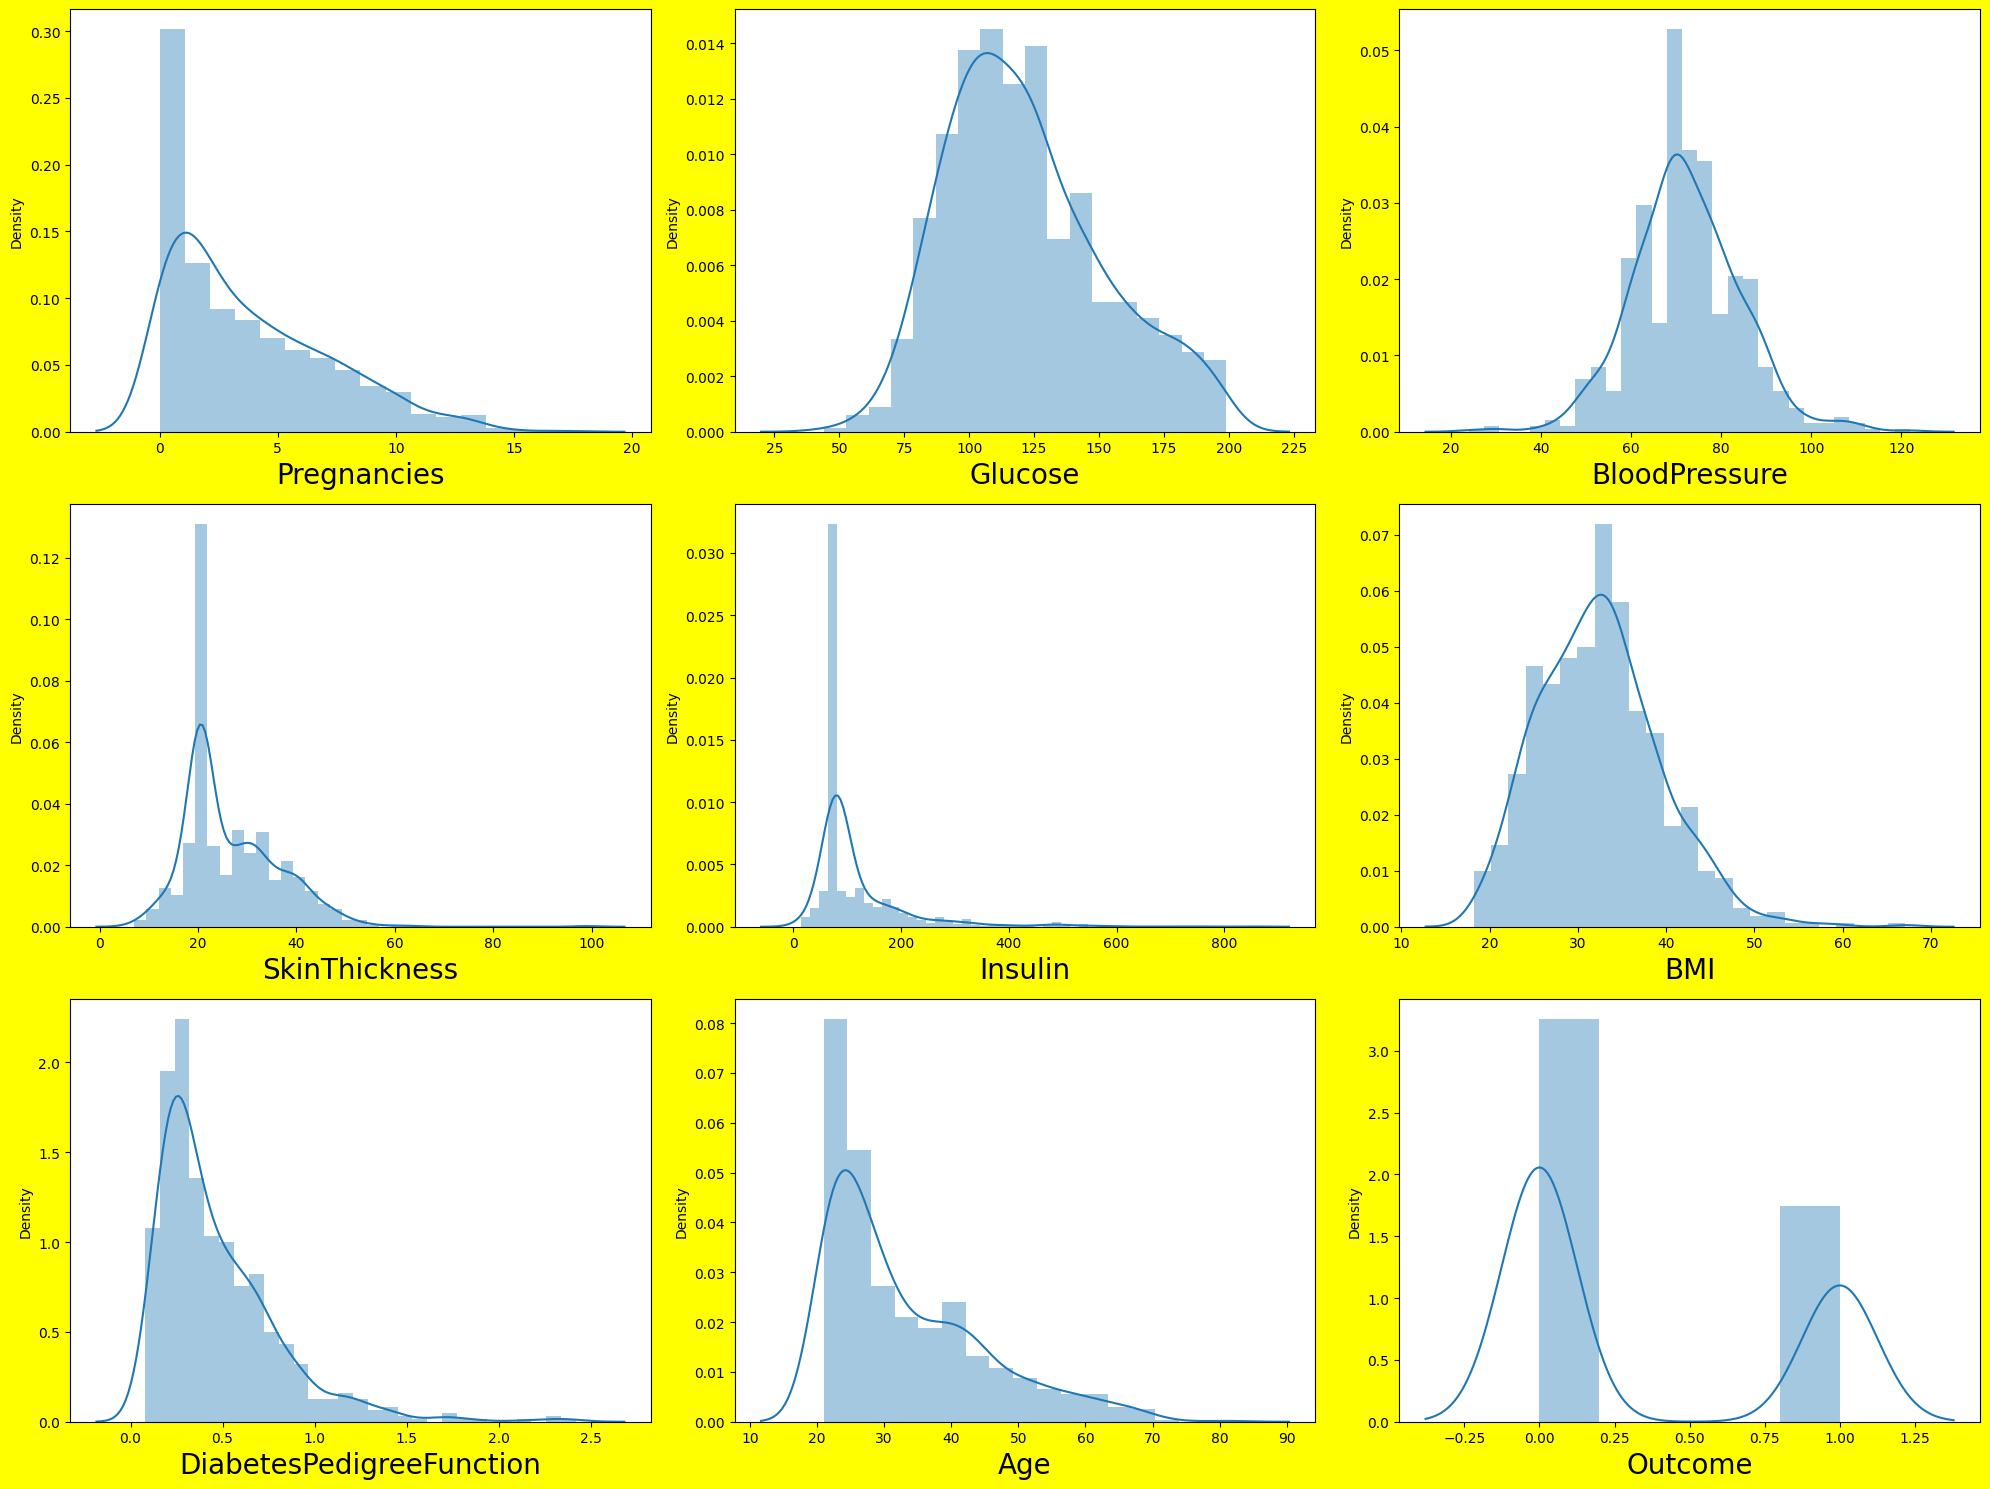

In [6]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [9]:
bp_high =(q3.BloodPressure + (1.5 * IQR.BloodPressure))
print(bp_high)
index=np.where(data['BloodPressure']>bp_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

104.0
(758, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
753,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
754,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
755,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
756,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [10]:
index

(array([ 43,  84, 106, 177, 362, 549, 658, 662, 672, 691], dtype=int64),)

In [11]:
st_high=(q3.SkinThickness + (1.5 * IQR.SkinThickness))
print(st_high)


index=np.where(data['SkinThickness']>st_high)


data=data.drop(data.index[index])


print(data.shape)


data.reset_index()

49.1953125
(746, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
741,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
742,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
743,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
744,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [12]:
insu_high=(q3.Insulin + (1.5 * IQR.Insulin))
print(insu_high)


index=np.where(data['Insulin']>insu_high)


data=data.drop(data.index[index])
print(data.shape)


data.reset_index()

198.42578125
(661, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
656,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
657,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
658,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
659,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [13]:
bmi_high=(q3.BMI + (1.5 * IQR.BMI))
print(bmi_high)


index=np.where(data['BMI']>bmi_high)


data=data.drop(data.index[index])
print(data.shape)



data.reset_index()

50.25
(658, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
653,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
654,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
655,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
656,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [14]:
dpf_high=(q3.DiabetesPedigreeFunction + (1.5 *IQR.DiabetesPedigreeFunction))
print(dpf_high)


index=np.where(data['DiabetesPedigreeFunction']>dpf_high)


data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.2
(635, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
630,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
631,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
632,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
633,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [15]:
age_high = (q3.Age + (1.5*IQR.Age))
print(age_high)


index=np.where(data['Age']>age_high)


data=data.drop(data.index[index])
print(data.shape)


data.reset_index()

66.5
(626, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
621,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
622,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
623,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
624,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
bp_low=(q1.BloodPressure - (1.5 * IQR.BloodPressure))
print(bp_low)

index=np.where(data['BloodPressure']<bp_low)



data=data.drop(data.index[index])


print(data.shape)


data.reset_index()

40.0
(623, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
618,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
619,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
620,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
621,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
x=data.drop(columns=['Outcome'])

y=data.Outcome

In [21]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [22]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [25]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8269230769230769

In [30]:
from sklearn.metrics import classification_report
import sklearn

In [31]:
fpr,tpr,threshold = sklearn.metrics.roc_curve(y_test,y_pred)


Threshold =  [inf  1.  0.]
True Positive Rate =  [0.         0.54761905 1.        ]
False Positive Rate =  [0.         0.07017544 1.        ]


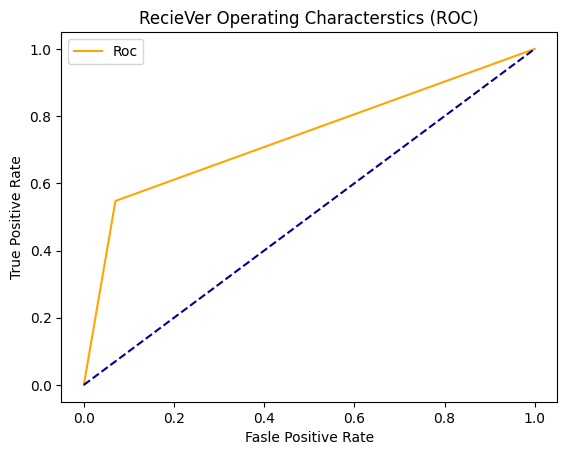

In [32]:
print('Threshold = ',threshold)
print('True Positive Rate = ',tpr)
print('False Positive Rate = ',fpr)

plt.plot(fpr,tpr,color='orange',label='Roc')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RecieVer Operating Characterstics (ROC)')
plt.legend()
plt.show()